In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

sys.path.append(os.path.join(os.getcwd(), "server"))
from core.config.config import config
from dal.mongo_db import MongoRetriever

In [ ]:
general_query = "Students requirements"
mid_specific_query = "What are the fees for University dormitories?"
specific_query = "What can I do if I lost my student ID card?"

prompts = [general_query, mid_specific_query, specific_query]
retriever = MongoRetriever(config.mongo.COLLECTION_NAME)
results = {
    query: retriever.get_all_similarity_scores(query) for query in prompts
}

c:\Users\domon\Documents\GitHub\ai-assistant-backend\.venv\Lib\site-packages\vertexai\_model_garden\_model_garden_models.py:278: UserWarning: This feature is deprecated as of June 24, 2025 and will be removed on June 24, 2026. For details, see https://cloud.google.com/vertex-ai/generative-ai/docs/deprecations/genai-vertexai-sdk.
  warning_logs.show_deprecation_warning()


In [72]:
all_scores = {query: np.array([result["similarity_score"] for result in results]) for query, results in results.items()}

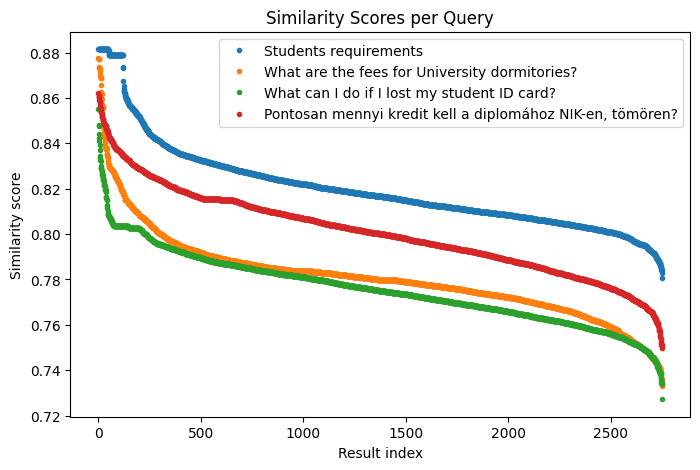

range similarity score for 'Students requirements': 0.10096478462219238
range similarity score for 'What are the fees for University dormitories?': 0.14453250169754028
range similarity score for 'What can I do if I lost my student ID card?': 0.12777602672576904
range similarity score for 'Pontosan mennyi kredit kell a diplomához NIK-en, tömören?': 0.11220663785934448


In [73]:
plt.figure(figsize=(8, 5))
for query, scores in all_scores.items():
    plt.plot(scores, marker="o", linestyle="", markersize=3, label=query)
plt.title("Similarity Scores per Query")
plt.xlabel("Result index")
plt.ylabel("Similarity score")
plt.legend()
plt.show()

for query, scores in all_scores.items():
    print(f"range similarity score for '{query}': {np.max(scores)-np.min(scores)}")

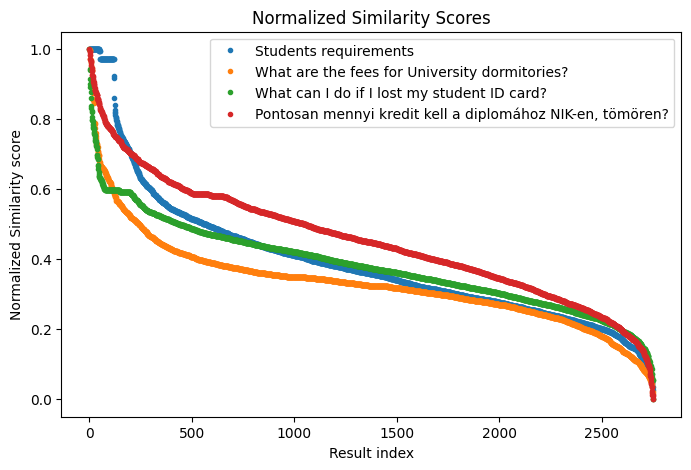

In [76]:
normalized_scores = {
    query: (scores - np.min(scores)) / (np.max(scores) - np.min(scores))
    for query, scores in all_scores.items()
}


plt.figure(figsize=(8, 5))
for query, scores in normalized_scores.items():
    plt.plot(scores, marker="o", linestyle="", markersize=3, label=query)
plt.xlabel("Result index")
plt.ylabel("Normalized Similarity score")
plt.title("Normalized Similarity Scores")
plt.legend()
plt.show()

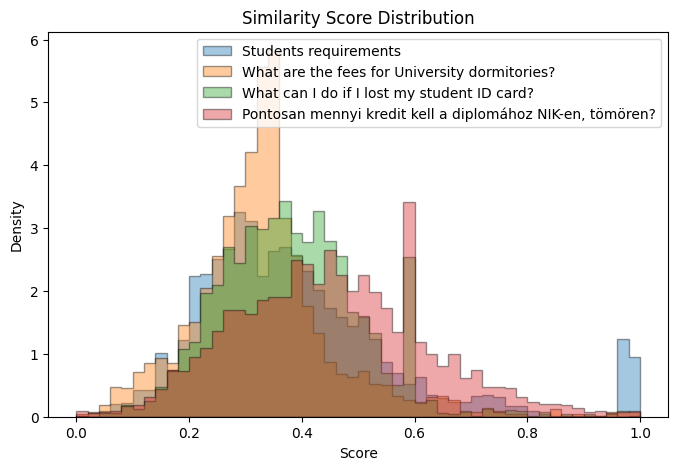

In [77]:
plt.figure(figsize=(8, 5))
for query, scores in normalized_scores.items():
    plt.hist(
        scores,
        bins=50,
        density=True,
        alpha=0.4,
        histtype="stepfilled",
        edgecolor="black",
        label=query,
    )
plt.title("Similarity Score Distribution")
plt.xlabel("Score")
plt.ylabel("Density")
plt.legend()
plt.show()

In [84]:
import builtins

for query, scores in normalized_scores.items():
    high_scores = [s for s in scores if s > 0.95]
    top_k = builtins.min(15, builtins.max(2, len(high_scores)))
    print(f"{query}: top_k = {top_k}")

Students requirements: top_k = 15
What are the fees for University dormitories?: top_k = 10
What can I do if I lost my student ID card?: top_k = 2
Pontosan mennyi kredit kell a diplomához NIK-en, tömören?: top_k = 10
